#### Jalaj Bansal, Manisha Kataria, Aditya Agarwal
### A1 - A
### Fischer's Linear Discriminant

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math
from mpl_toolkits import mplot3d

## Dataset Read

In [13]:
# loading the data
dataframe = pd.read_csv("dataset_FLD.csv",header = None)
# x,y and z are three features respectively
dataframe.columns = ["x", "y", "z", "classs"]

In [14]:
dataframe.head()

,x,y,z,classs
0,-6.672418,-1.206198,-1.081050,0
1,1.675598,0.614994,-0.971600,0
2,-4.039058,0.335102,0.544618,1
3,0.793526,-0.235277,0.551771,1
4,3.820273,-0.274691,0.454743,1


## Visulization in 3-D after simple processing

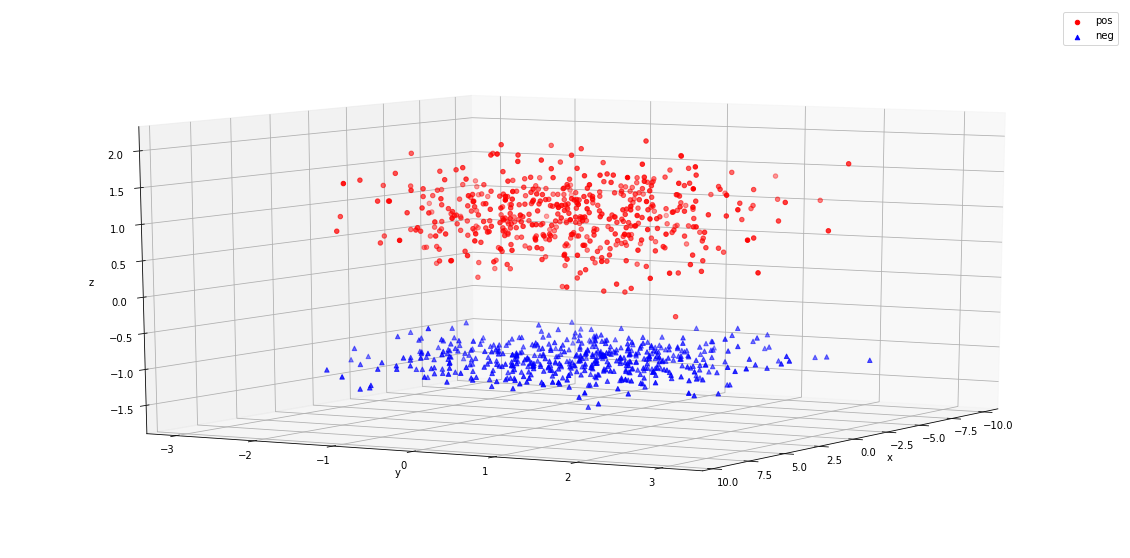

In [15]:
# split the data and labels and then convert dataframe into numpy arrays

values = dataframe.values
g = values[:,:-1]
b = values[:,-1]
a=(dataframe["classs"] == 1)
c=(dataframe["classs"] == 0)
pos = dataframe[a].values
neg = dataframe[c].values

# visualizing data in 3d

plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
ax.scatter3D(pos[:,0], pos[:,1], pos[:,2], c='r',marker='o')
ax.scatter3D(neg[:,0], neg[:,1], neg[:,2], c='b',marker='^')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(10,30)
plt.legend(['pos','neg'])
plt.show()

## Finding Sw - Within Class scatter matrix

In [16]:
# finding the matrix Sw

pos_mean = np.mean(g[b==1],axis=0)
neg_mean = np.mean(g[b==0],axis=0)
feats = g.shape[1]
S_w_matrix = np.zeros((feats,feats))
classes = np.unique(dataframe['classs'].values)
for classs in classes:
     g_class = g[b==classs]
     n_class = g_class.shape[0]
     mu_c = np.mean(g_class,axis=0)
     S_w_matrix += (1/float(n_class))*(g_class - mu_c).T.dot((g_class - mu_c))

## Projection vector W

In [17]:
# finding w from the formula S_w^{-1}(m1-m2)

diff_mean = (pos_mean - neg_mean).reshape(feats,1)
w = np.linalg.inv(S_w_matrix).dot(diff_mean)
w = w/np.linalg.norm(w)
w

array([[-0.00655686],
       [-0.01823739],
       [ 0.99981218]])

## Plots of neg and pos points after Projection using W
### Also plotted the intersection line/threshold in 1D by finding intersection of the distributions

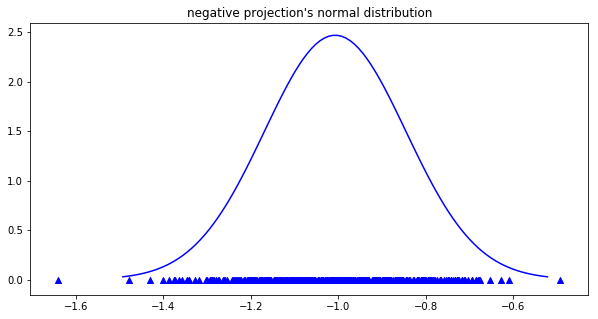

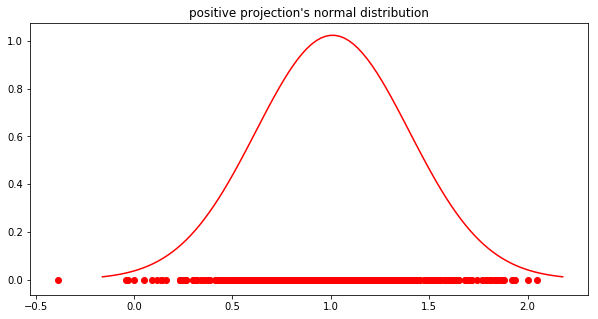

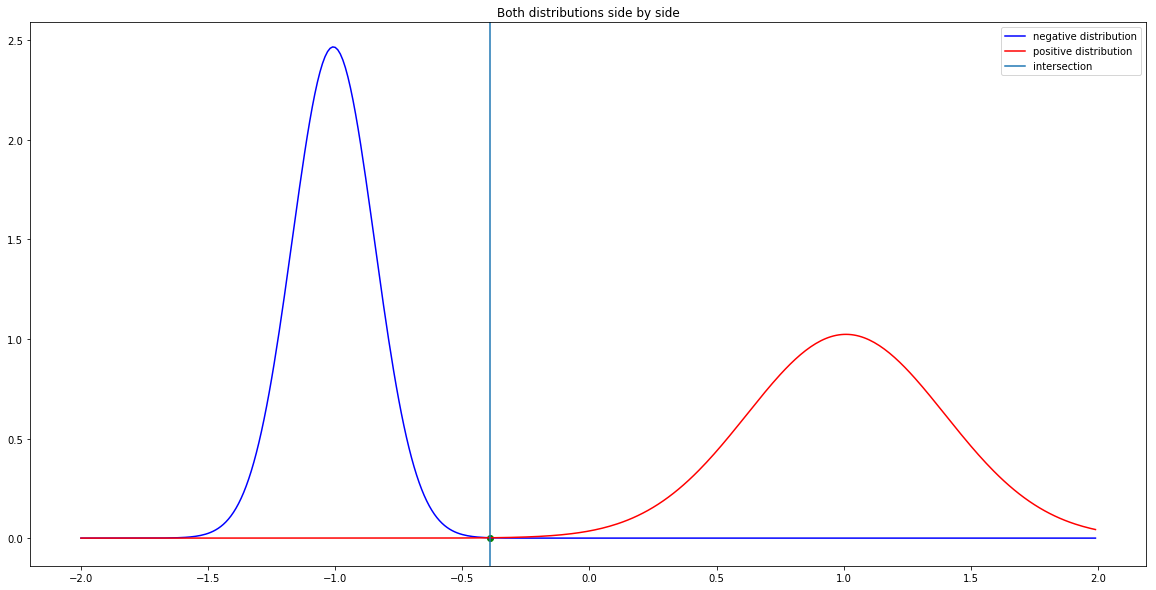

-0.38930280209937657

In [18]:

def intersect_extract(one_m,two_m,one_s,two_s):
    
    a = 1/(2*one_s**2) - 1/(2*two_s**2)
    b = two_m/(two_s**2) - one_m/(one_s**2)
    c = one_m**2 /(2*one_s**2) - two_m**2 / (2*two_s**2) - np.log(two_s/one_s)
    ans = np.roots([a,b,c])
    return ans 

def distribution_normal(x , m , stand_dev):
 
    density_probability = (1/(np.sqrt(2*np.pi)*stand_dev)) * np.exp(-0.5*((x-m)/stand_dev)**2)
    return density_probability

def gauss_display(X):
  
    cols = ['b','r']
    shapes = ['^','o']
    m_1=[0,0]
    s_1=[0,0]
    # go through each class
    headings = ["negative projection's normal distribution","positive projection's normal distribution"]
    for i,classs in enumerate(classes):
        classs_projs = g[b==classs].dot(w)
        classs_projs_mean = np.mean(classs_projs)
        m_1[i]=classs_projs_mean
        classs_projs_std = np.std(classs_projs)
        s_1[i] = classs_projs_std
        x_data = np.linspace(classs_projs_mean - 3*classs_projs_std, classs_projs_mean + 3*classs_projs_std, 100)
        plt.figure(figsize=(10, 5))
        plt.plot(x_data, distribution_normal(x_data, classs_projs_mean, classs_projs_std),c=cols[i])
        plt.scatter(classs_projs,np.zeros_like(classs_projs),c=cols[i],marker=shapes[i])
        plt.title(headings[i])
        plt.show()
        
    result_threshold = intersect_extract(m_1[0],m_1[1],s_1[0],s_1[1])
    
    x_data = np.arange(-2,2,0.01)
    plt.figure(figsize=(20, 10))
    plt.plot(x_data, distribution_normal(x_data, m_1[0], s_1[0]),c=cols[0])
    plt.plot(x_data, distribution_normal(x_data, m_1[1], s_1[1]),c=cols[1])
    plt.scatter(np.array([result_threshold[-1]]),np.zeros_like(np.array([result_threshold[-1]])),c='g')
    plt.axvline(x=result_threshold[-1])
    plt.legend(['negative distribution','positive distribution','intersection'])
    plt.title("Both distributions side by side")
    plt.show()
    
    return result_threshold[-1]

result_threshold = gauss_display(g)
result_threshold

## Hyperplane seperating the two classes in 3D

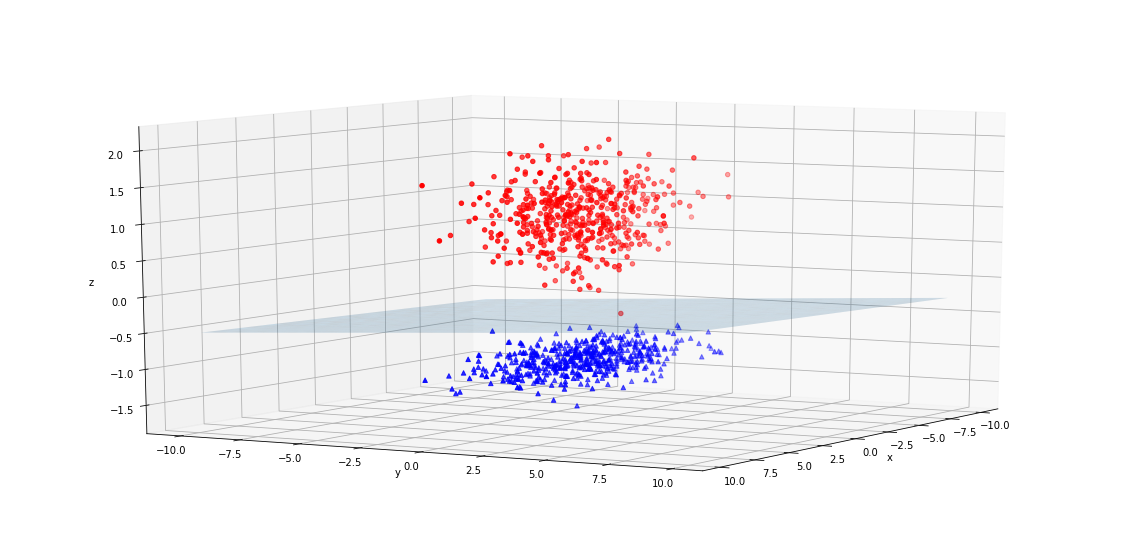

In [19]:
# initialize the x and y equally distant coordinates and find the z coordinate from the discriminant vector then show the plane in 3d
plt.figure(figsize=(20, 10))
ax = plt.axes(projection='3d')
xx,yy = np.meshgrid(np.arange(-10, 10, 0.25), np.arange(-10, 10, 0.25))
Z = ((-w[0] * xx) - (w[1] * yy)  + result_threshold )  /w[2]
ax.plot_surface(xx, yy, Z, alpha=0.2)
ax.scatter3D(pos[:,0], pos[:,1], pos[:,2], c='r',marker='o')
ax.scatter3D(neg[:,0], neg[:,1], neg[:,2], c='b',marker='^')
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.view_init(10,30)

## Accuracy

In [20]:
# evaluating accuraacy of fischer linear discriminant model
b= b.reshape(b.shape[0],1)
res = np.where(g.dot(w)-result_threshold >=0 , 1, 0)
accuracy = 100*np.sum((res == b))/len(b)
print("Accuracy = {}%".format(accuracy))

Accuracy = 100.0%
